<a href="https://colab.research.google.com/github/anastasiiaCher/python-for-DPaV/blob/main/labs/%D0%9B%D0%A06_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2%D1%8B%D1%85_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 6. Обработка и классификация текстовых данных.
**Выполнил: студент 4 курса, группы ПИЖ-б-о-22-1, Джараян Арег Александрович
**

# Постановка задачи


**Цель работы:** применение наивного байесовского классификатора для определения тональности текстов на русском языке.

**Краткое описание:** в ходе выполнения лабораторной работы необходимо провести предобработку сырых текстовых данных и настроить гиперпараметры нескольких векторайзеров так, чтобы точность классификации (`accuracy`) наивным байесовским классификатором из `sklearn` составила не менее 0.74.

# Данные


В папке [Data/lab6](https://drive.google.com/drive/folders/1jo_V1RYyFKNa2TR_VNZYMGKUi3T1Jpze?usp=sharing) расположена таблица с русскоязычными текстовыми отзывами на предметы одежды. Также эти же данные можно найти [по сслыке](https://github.com/sismetanin/rureviews). Все задания лабораторной работы необходимо выполнять по этим данным.

##### **Формат данных**

```
review	sentiment
Очень плохо упакован, весь  мятый и смотрится не так как на фото	negative
заказ не пришёл но деньги вернули	neautral
Мягкая удобная тёплая. Все замечательно. Ничего не торчит запахов нет. Продавцу + в карму	positive
...
```
##### **Описание полей**

 - ```review``` — сырой текст отзыва в большинстве случаев на русском языке, встречаются отдельные записи на английском;
 - ```sentiment``` — тональность отзыва (позитивный, нейтральный, негативный), классы сбалансированы.

# Практические задания

## Предварительная обработка данных

### Токенизация

Токенизировать – значит разделить текст на части: слова, ключевые слова, фразы, символы и т.д., иными словами – **токены**.

Самый простой способ токенизировать текст – разделить с помощью метода `split()`. Но `split` упускает очень много всего, например, не отделяет пунктуацию от слов. Кроме этого, есть ещё много менее тривиальных проблем, поэтому лучше использовать готовые токенизаторы, к примеру:

- `Yargy` парсер. Документация: https://github.com/natasha/yargy
- Парсер из модуля `nltk`. Учебник по nltk: https://www.nltk.org/book



In [ ]:
# токенизация через split()

text = '''
Продаётся LADA 4x4. ПТС 01.12.2018, куплена 20 января 19 года, 10 000 км пробега.
Комплектация полная. Новая в салоне 750 000, отдам за 650 000.
Возможен обмен на ВАЗ-2110 или ВАЗ 2109 с вашей доплатой.
Краснодар, ул. Миклухо-Маклая, д. 4/5, подьезд 1
Тел. 8(999)1234567, 8 903 987-65-43, +7 (351) 111 22 33
И.И. Иванов (Иван Иванович)
'''

tokens = text.split()
print(f"split() определил {len(tokens)} токенов")
print(tokens)

split() определил 56 токенов
['Продаётся', 'LADA', '4x4.', 'ПТС', '01.12.2018,', 'куплена', '20', 'января', '19', 'года,', '10', '000', 'км', 'пробега.', 'Комплектация', 'полная.', 'Новая', 'в', 'салоне', '750', '000,', 'отдам', 'за', '650', '000.', 'Возможен', 'обмен', 'на', 'ВАЗ-2110', 'или', 'ВАЗ', '2109', 'с', 'вашей', 'доплатой.', 'Краснодар,', 'ул.', 'Миклухо-Маклая,', 'д.', '4/5,', 'подьезд', '1', 'Тел.', '8(999)1234567,', '8', '903', '987-65-43,', '+7', '(351)', '111', '22', '33', 'И.И.', 'Иванов', '(Иван', 'Иванович)']


In [ ]:
%%capture
# токенизация через yargy
!pip install yargy

In [ ]:
from yargy.tokenizer import MorphTokenizer

tknzr = MorphTokenizer()
tokens = [_.value for _ in tknzr(text)]
print(f"yargy определил {len(tokens)} токенов")
print(tokens)

yargy определил 107 токенов
['\n', 'Продаётся', 'LADA', '4', 'x', '4', '.', 'ПТС', '01', '.', '12', '.', '2018', ',', 'куплена', '20', 'января', '19', 'года', ',', '10', '000', 'км', 'пробега', '.', '\n', 'Комплектация', 'полная', '.', 'Новая', 'в', 'салоне', '750', '000', ',', 'отдам', 'за', '650', '000', '.', '\n', 'Возможен', 'обмен', 'на', 'ВАЗ', '-', '2110', 'или', 'ВАЗ', '2109', 'с', 'вашей', 'доплатой', '.', '\n', 'Краснодар', ',', 'ул', '.', 'Миклухо', '-', 'Маклая', ',', 'д', '.', '4', '/', '5', ',', 'подьезд', '1', '\n', 'Тел', '.', '8', '(', '999', ')', '1234567', ',', '8', '903', '987', '-', '65', '-', '43', ',', '+', '7', '(', '351', ')', '111', '22', '33', '\n', 'И', '.', 'И', '.', 'Иванов', '(', 'Иван', 'Иванович', ')', '\n']


In [ ]:
%%capture
# токенизация через nltk
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

In [ ]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(text)
print(f"nltk определил {len(tokens)} токенов")
print(tokens)

nltk определил 81 токенов
['Продаётся', 'LADA', '4x4', '.', 'ПТС', '01.12.2018', ',', 'куплена', '20', 'января', '19', 'года', ',', '10', '000', 'км', 'пробега', '.', 'Комплектация', 'полная', '.', 'Новая', 'в', 'салоне', '750', '000', ',', 'отдам', 'за', '650', '000', '.', 'Возможен', 'обмен', 'на', 'ВАЗ-2110', 'или', 'ВАЗ', '2109', 'с', 'вашей', 'доплатой', '.', 'Краснодар', ',', 'ул', '.', 'Миклухо-Маклая', ',', 'д', '.', '4/5', ',', 'подьезд', '1', 'Тел', '.', '8', '(', '999', ')', '1234567', ',', '8', '903', '987-65-43', ',', '+7', '(', '351', ')', '111', '22', '33', 'И.И', '.', 'Иванов', '(', 'Иван', 'Иванович', ')']


В `nltk` есть довольно много токенизаторов. Токенизатор подбирается, исходя из языка и  требований задачи.

In [ ]:
from nltk import tokenize

print(f"Количество токенизаторов в nltk: {len(dir(tokenize))}")
dir(tokenize)[:5]

Количество токенизаторов в nltk: 61


['BlanklineTokenizer',
 'LegalitySyllableTokenizer',
 'LineTokenizer',
 'MWETokenizer',
 'NLTKWordTokenizer']

### Очистка текста

Очистка текста включает в себя несколько этапов:
- удаление пунктуации;
- преобразование регистра;
- удаление стоп-слов.

Сюда же включается исправление опечаток и этапы очистки от лишней информации (тегов html-разметки, url, непонятных символов и др.) и приведения отдельных потенциально важных элементов текстов к единому виду (времени или дат, например).

In [ ]:
# набор пунктуационных символов зависит от задачи и текста
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# удаление стандартной пунктуации
punct = string.punctuation
clean_words = [w.strip(punct) for w in word_tokenize(text)]
print(clean_words)

['Продаётся', 'LADA', '4x4', '', 'ПТС', '01.12.2018', '', 'куплена', '20', 'января', '19', 'года', '', '10', '000', 'км', 'пробега', '', 'Комплектация', 'полная', '', 'Новая', 'в', 'салоне', '750', '000', '', 'отдам', 'за', '650', '000', '', 'Возможен', 'обмен', 'на', 'ВАЗ-2110', 'или', 'ВАЗ', '2109', 'с', 'вашей', 'доплатой', '', 'Краснодар', '', 'ул', '', 'Миклухо-Маклая', '', 'д', '', '4/5', '', 'подьезд', '1', 'Тел', '', '8', '', '999', '', '1234567', '', '8', '903', '987-65-43', '', '7', '', '351', '', '111', '22', '33', 'И.И', '', 'Иванов', '', 'Иван', 'Иванович', '']


In [ ]:
# преобразование регистра
clean_words = [w.lower() for w in clean_words if w != '']
print(clean_words)

['продаётся', 'lada', '4x4', 'птс', '01.12.2018', 'куплена', '20', 'января', '19', 'года', '10', '000', 'км', 'пробега', 'комплектация', 'полная', 'новая', 'в', 'салоне', '750', '000', 'отдам', 'за', '650', '000', 'возможен', 'обмен', 'на', 'ваз-2110', 'или', 'ваз', '2109', 'с', 'вашей', 'доплатой', 'краснодар', 'ул', 'миклухо-маклая', 'д', '4/5', 'подьезд', '1', 'тел', '8', '999', '1234567', '8', '903', '987-65-43', '7', '351', '111', '22', '33', 'и.и', 'иванов', 'иван', 'иванович']


**Стоп-слова** — высокочастотные слова, которые не дают никакой информации о конкретном тексте. Они составляют верхушку частотного списка в любом языке. Набор стоп-слов не универсален, он будет зависеть от задачи. Обычно начинают с готовых списков стоп-слов, а потом их дополняют.

In [ ]:
# список стоп-слов для русского языка в nltk
from nltk.corpus import stopwords
sw = stopwords.words('russian')
print(f"Количество стоп-слов: {len(sw)}")
print(sw)

Количество стоп-слов: 151
['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве',

In [ ]:
# удаление стоп-слов
print([w if w not in sw else print(w) for w in clean_words])

в
за
на
или
с
['продаётся', 'lada', '4x4', 'птс', '01.12.2018', 'куплена', '20', 'января', '19', 'года', '10', '000', 'км', 'пробега', 'комплектация', 'полная', 'новая', None, 'салоне', '750', '000', 'отдам', None, '650', '000', 'возможен', 'обмен', None, 'ваз-2110', None, 'ваз', '2109', None, 'вашей', 'доплатой', 'краснодар', 'ул', 'миклухо-маклая', 'д', '4/5', 'подьезд', '1', 'тел', '8', '999', '1234567', '8', '903', '987-65-43', '7', '351', '111', '22', '33', 'и.и', 'иванов', 'иван', 'иванович']


### Нормализация текста

**Нормализация токенов** (token normalization) – это процесс приведения токенов к канонической форме, чтобы устранить несущественные различия между последовательностями символов.

Для многих задач естественно рассматривать как отдельный признак каждое *слово*, а не каждую его отдельную форму.

**Стемминг** (англ. stemming — находить происхождение) — это процесс нахождения основы слова для заданного исходного слова. Основа слова не обязательно совпадает с морфологическим корнем слова.

**Лемматизация** – это сведение разных форм одного слова к начальной форме – **лемме**.

**Пример:**

Лексема `saw` после стемминга может стать буквой `s`, а в ходе лемматизации либо словом `see`, либо `saw`, в зависимости от того, глагол это или существительное.

#### Стемминг

Стемминг — отсечение от слова окончаний и суффиксов, чтобы оставшаяся часть, называемая stem, была одинаковой для всех грамматических форм слова. Стем необязательно совпадает с морфлогической основой слова. Одинаковый стем может получиться и не у однокоренных слов и наоборот — в этом проблема стемминга.

1-ый вид ошибки: белый, белка, белье $\implies$ бел

2-ой вид ошибки: трудность, трудный $\implies$ трудност, труд

3-ий вид ошибки: быстрый, быстрее $\implies$ быст, побыстрее $\implies$ побыст

Самый простой алгоритм, [алгоритм Портера](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%B5%D0%BC%D0%BC%D0%B5%D1%80_%D0%9F%D0%BE%D1%80%D1%82%D0%B5%D1%80%D0%B0), состоит из 5 циклов команд, на каждом цикле – операция удаления / замены суффикса. Возможны вероятностные расширения алгоритма.

**Snowball stemmer** - улучшенный вариант стеммера Портера; в отличие от него умеет работать не только с английским текстом.

In [ ]:
from nltk.stem.snowball import SnowballStemmer

SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [ ]:
poem = '''
По морям, играя, носится
с миноносцем миноносица.
Льнет, как будто к меду осочка,
к миноносцу миноносочка.
И конца б не довелось ему,
благодушью миноносьему.
Вдруг прожектор, вздев на нос очки,
впился в спину миноносочки.
Как взревет медноголосина:
Р-р-р-астакая миноносина!
'''

words = [w.strip(punct).lower() for w in word_tokenize(poem)]
words = [w for w in words if w not in sw and w != '']

In [ ]:
snowball = SnowballStemmer("russian")

for w in words:
    print("%s: %s" % (w, snowball.stem(w)))

морям: мор
играя: игр
носится: нос
миноносцем: миноносц
миноносица: миноносиц
льнет: льнет
меду: мед
осочка: осочк
миноносцу: миноносц
миноносочка: миноносочк
конца: конц
б: б
довелось: довел
благодушью: благодуш
миноносьему: минонос
прожектор: прожектор
вздев: вздев
нос: нос
очки: очк
впился: впил
спину: спин
миноносочки: миноносочк
взревет: взревет
медноголосина: медноголосин
р-р-р-астакая: р-р-р-астак
миноносина: миноносин


#### Лемматизация

Лемматизация — процесс приведения словоформы к лемме, т.е. нормальной (словарной) форме. Это более сложная задача, чем стемминг, но и результаты дает гораздо более осмысленные, особенно для языков с богатой морфологией.

* кошке, кошку, кошкам, кошкой $\implies$ кошка
* бежал, бежит, бегу $\implies$ бежать
* белому, белым, белыми $\implies$ белый

[Pymorphy 2](http://pymorphy2.readthedocs.io/en/latest/) — полноценный морфологический анализатор, целиком написанный на Python. Для русского языка используются словари OpenCorpora и [граммемы](https://pymorphy2.readthedocs.io/en/latest/user/grammemes.html), принятые в OpenCorpora (с небольшими изменениями).

In [ ]:
%%capture
!pip install pymorphy2

In [ ]:
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()

for w in words:
    print("%s: %s :%s" % (w, snowball.stem(w), pymorphy2_analyzer.parse(w)[0].normal_form))

морям: мор :море
играя: игр :играть
носится: нос :носиться
миноносцем: миноносц :миноносец
миноносица: миноносиц :миноносица
льнет: льнет :льнуть
меду: мед :мёд
осочка: осочк :осочок
миноносцу: миноносц :миноносец
миноносочка: миноносочк :миноносочек
конца: конц :конец
б: б :б
довелось: довел :довестись
благодушью: благодуш :благодушие
миноносьему: минонос :миноносий
прожектор: прожектор :прожектор
вздев: вздев :вздеть
нос: нос :нос
очки: очк :очки
впился: впил :впиться
спину: спин :спина
миноносочки: миноносочк :миноносочек
взревет: взревет :взреветь
медноголосина: медноголосин :медноголосина
р-р-р-астакая: р-р-р-астак :р-р-р-астакать
миноносина: миноносин :миноносина


### Векторизация текста

Допустим, мы хотим применить вот такую модель для классификации текстов. Например, хотим определять спам и не спам.
$$ \hat{y} = \psi (w_1 x_1 + w_2 x_2 + ... + w_k x_k + b)$$

$\hat{y} = \lbrace spam, ham \rbrace$

$w_i$ и $b$ - это параметры, которые нужно найти в процессе обучения (настройки, fitting) модели.

А что такое для текстов $x_i$? Нам нужно получить преобразование текстов в численный вектор, с которым может работать стандартный алгоритм машинного обучения. Как это сделать?

Тут может быть много разных ответов. Самая простая идея - это 0 или 1, где 0 - если соответствующего токена нет в тексте, а 1 - если есть.

#### Мешок n-грамм

Самые мелкие структуры языка, с которыми можно работать, называются **n-граммами**.
У n-граммы есть параметр n - количество слов, которые попадают в такое представление текста.
* Если n = 1 - то смотрим на то, сколько раз каждое слово встретилось в тексте. Получаются униграммы.
* Если n = 2 - то смотрим на то, сколько раз каждая пара подряд идущих слов, встретилась в тексте. Получаются биграммы.

Численное представление текста получается путем подсчета количества n-грамм в текстах. Так как результат не зависит от порядка слов в текстах, то говорят, что такая модель представления текстов в виде векторов получается из *гипотезы представления текста как мешка слов*.

Прежде чем получать n-граммы, нужно разделить текст на токены и провести все необходимые для задачи этапы предобработки текста. Векторизация – последний этап перед построением модели.

Самый простой способ извлечь признаки из текстовых данных – использовать класс `CountVectorizer` из `sklearn`.

Объект `CountVectorizer` делает следующее:
* строит для каждого документа (каждой пришедшей ему строки) вектор размерности `n`, где `n` – количество слов или n-грам во всём корпусе;
* заполняет каждый i-тый элемент количеством вхождений слова в данный документ.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# инициализация векторайзера с униграммами, биграммами и триграммами
vectorizer = CountVectorizer(ngram_range=(1, 3))

# fit_transform сначала обучает векторайзер, а потом сразу применает его к набору данных
vectorized_text = vectorizer.fit_transform([" ".join(tokens)])

# первые 5 объектов вектора
pd.DataFrame(vectorized_text.T.todense(), index=vectorizer.get_feature_names_out(), columns=["n-gram score"]).head()

,n-gram score
000,3
000 возможен,1
000 возможен обмен,1
000 км,1
000 км пробега,1


#### Мешок символьных n-gram

В некоторых задачах в качестве признаков могут быть использованы n-граммы символов. Для этого необходимо установить в ```CountVectorizer()``` параметр ```analyzer = 'char'```, то есть анализировать символы.

In [ ]:
# инициализация векторайзера для символов
char_vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 8))

# обучаем его и сразу применяем тексту
char_vectorized_text = char_vectorizer.fit_transform([" ".join(tokens)])

# первые 5 объектов вектора
pd.DataFrame(char_vectorized_text.T.todense(), index=char_vectorizer.get_feature_names_out(), columns=["Char n-gram score"]).head()

,Char n-gram score
(,3
(,3
( 3,1
( 35,1
( 351,1


Cимвольные n-граммы используются, например, для задачи определения языка. Ещё одна замечательная особенность признаков-символов – для них не нужна токенизация и лемматизация, можно использовать такой подход для языков, у которых нет готовых анализаторов.

#### TF-IDF векторизация

`TfidfVectorizer` делает то же, что и `CountVectorizer`, но в качестве значений выдает **TF-IDF** каждого слова.

**TF (term frequency)** – относительная частотность слова в документе:
$$ TF(t,d) = \frac{n_{t}}{\sum_k n_{k}} $$

**IDF (inverse document frequency)** – обратная частота документов, в которых есть это слово:
$$ IDF(t, D) = \mbox{log} \frac{|D|}{|{d : t \in d}|} $$

Перемножаем их:
$$TFIDF(t, d, D) = TF(t,d) \times IDF(i, D)$$

Идея в том, что если слово часто встречается в одном документе, но в целом по корпусу встречается в небольшом
количестве документов, у него высокий TF-IDF.

Для получения векторного представления текста с помощью TF-IDF удобно использовать `TfidfVectorizer()`, действующий, как ```CountVectorizer()```.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# инициализация векторайзера для символов
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 4))

# обучаем его и сразу применяем тексту
tfidf_vectorized_text = tfidf_vectorizer.fit_transform([" ".join(tokens)])

# первые 5 объектов вектора
pd.DataFrame(tfidf_vectorized_text.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["TF-IDF"]).head()

,TF-IDF
000,0.201347
000 возможен,0.067116
000 возможен обмен,0.067116
000 возможен обмен на,0.067116
000 км,0.067116


Помимо диапазона n-грамм, в каждом из трех векторайзеров можно в качестве гиперпараметра передать максимальное и минимальное число вхождения n-граммы в документ (`max_df` и `min_df`), а также максимальное количество используемых из словаря n-грамм (`max_features`). При настройке гиперпараметров векторайзеров их тоже следует учитывать.

## Задание 1

Для обработки текста выполните следующие шаги:
- токенизация;
- приведение к нижнему регистру;
- удаление стоп-слов (с расширением стандартного списка);
- очистка текста с помощью регулярных выражений;
- нормализация (лемматизация или стемминг);
- векторизация (с настройкой гиперпараметров).

Обязательными этапами предобработки являются **токенизация** и **векторизация**. Необходимо ли включать остальные шаги, нужно решить в процессе настройки модели. Порядок выполнения шагов предобработки тоже может отличаться от приведенного в списке.

Обязательно использование векторайзеров:
1. Мешок n-грамм.
2. TF-IDF.
3. Символьные n-граммы.

Для каждого из векторайзеров нужно настроить значения следующих гиперпараметров:
- `ngram_range`;
- `max_df`;
- `min_df`;
- `max_features`.

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import re
import string

# Для обработки текста
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

# Для лемматизации
import pymorphy2

# Для векторизации
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Для классификации
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных NLTK
nltk.download('punkt')
nltk.download('stopwords')

print("Все библиотеки успешно импортированы!")

Все библиотеки успешно импортированы!


In [ ]:
# Загрузка данных
df = pd.read_csv('/content/women-clothing-accessories.3-class.balanced.csv', sep='\t')

# Просмотр первых строк
print(f"Размер данных: {df.shape}")
print("\nПервые 5 строк:")
print(df.head())

print("\nРаспределение классов:")
print(df['sentiment'].value_counts())

Размер данных: (90000, 2)

Первые 5 строк:
                                              review sentiment
0  качество плохое пошив ужасный (горловина напер...  negative
1  Товар отдали другому человеку, я не получила п...  negative
2  Ужасная синтетика! Тонкая, ничего общего с пре...  negative
3  товар не пришел, продавец продлил защиту без м...  negative
4      Кофточка голая синтетика, носить не возможно.  negative

Распределение классов:
sentiment
negative    30000
neautral    30000
positive    30000
Name: count, dtype: int64


In [ ]:
# Инициализация инструментов
stop_words = set(stopwords.words('russian'))
# Добавление дополнительных стоп-слов
additional_stopwords = {'это', 'также', 'еще', 'уже', 'все', 'всё', 'свой', 'своя', 'свои', 'наш', 'ваш', 'который', 'которые'}
stop_words.update(additional_stopwords)

stemmer = SnowballStemmer("russian")
morph = pymorphy2.MorphAnalyzer()

def preprocess_text(text, method='lemmatization'):
    """
    Функция предобработки текста
    method: 'lemmatization' или 'stemming'
    """
    if not isinstance(text, str):
        return ""

    # 1. Удаление лишних символов с помощью регулярных выражений
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # удаление URL
    text = re.sub(r'[@#]\w+', '', text)  # удаление упоминаний и хештегов
    text = re.sub(r'\d+', '', text)  # удаление цифр
    text = re.sub(r'[^\w\s]', ' ', text)  # удаление пунктуации, кроме пробелов

    # 2. Токенизация
    tokens = word_tokenize(text.lower())

    # 3. Удаление стоп-слов и коротких слов
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # 4. Нормализация
    if method == 'lemmatization':
        tokens = [morph.parse(word)[0].normal_form for word in tokens]
    elif method == 'stemming':
        tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)

# Применение предобработки
df['processed_review'] = df['review'].apply(lambda x: preprocess_text(x, method='lemmatization'))

print("Пример обработки текста:")
print("Оригинал:", df['review'].iloc[0])
print("Обработанный:", df['processed_review'].iloc[0])
print("\nКоличество обработанных текстов:", len(df))

Пример обработки текста:
Оригинал: качество плохое пошив ужасный (горловина наперекос) Фото не соответствует Ткань ужасная рисунок блеклый маленький рукав не такой УЖАС!!!!! не стоит за такие деньги г.......
Обработанный: качество плохой пошив ужасный горловина наперекос фото соответствовать ткань ужасный рисунок блёклый маленький рукав ужас стоить такой деньга

Количество обработанных текстов: 90000


## Построение модели

### Наивный байесовский классификатор

Рассмотрим задачу классификации.

Есть объект $x^{(i)}$, для него нужно оценить вероятность того, что его метка класса - это $k$. Это можно записать с использованием условной вероятности.

$$P(y^{(i)}=k|x^{(i)})$$


$$P(y^{(i)}=k) != P(y^{(i)}=k|x^{(i)})$$

***Определение***
Условной вероятностью $A$ при условии $B$, называется $P(A|B)=\frac{P(AB)}{P(B)}$. Здесь $P(AB)$ — вероятность одновременного наступления событий $A$ и $B$, а $P(B)>0$.

Для оценки этой вероятности воспользуемся теоремой Байеса, которая говорит нам о том, что апостериорная вероятность - прямо пропорциональна произведению априорной вероятности на правдоподобие.

***Теорема (формула) Байеса***

$$P(A|B)=\frac{P(B|A)\,P(A)}{P(B)}$$ при $P(B) > 0$

Заметим, что если использовать формулу полной вероятности, то можно записать формулу Байеса в виде:

$$P(A_i|B)=\frac{P(B|A_i)\,P(A_i)}{\sum_{i=1}^{n}P(B|A_i)P(A_i)}$$

> Как формула Байеса связана с задачей классификации?

Пусть $X$ множество объектов, $Y$ конечное множество имён классов,
множество $X \times Y$ является вероятностным пространством с плотностью распределения $p(x,y)=p(y)p(x|y)$.
Вероятности появления объектов каждого из классов $P_y=p(y)$ называются ''априорными вероятностями классов''.
Плотности распределения $p_y(x)=p(x|y)$ называются ''функциями правдоподобия классов''.

По известным плотностям распределения $p_y(x)$ и априорным вероятностям $P_y$ всех классов $y \in Y$ строят алгоритм $a(x)$, минимизирующий вероятность ошибочной классификации.

По формуле Байеса:

$$p(y|x) = \frac{p(x|y)\,p(y)}{p(x)}$$

По формуле полной вероятности:
$$ p(x) = \sum_{y_i} (p(x|y_i)p(y_i)$$

> Откуда взять эти самые "априорные вероятности классов" и "функции правдоподобия классов"?

Априорные вероятности классов $P_y$ можно оценить согласно закону больших чисел, тогда частота появления объектов каждого из классов равна $P'_y=\frac{l_y}{l}$ где $l_y=|X^l_y|, y \in Y$ сходится по вероятности к $P_y$ при $l_y \to \infty$. Чем больше длина выборки, тем точнее выборочная оценка $P'_y$.

Функции правдоподобия нам неизвестны, на самом деле, но по данным мы можем построить их эмпирические оценки.

> Для применения наивного байесовского классификатора при работе с текстом в `sklearn` существует `MultinomialNB`.

### Оценка качества классификации

**Точность** (Accuracy) показывает долю правильных ответов классификатора от общего числа предсказаний.

**Точность** (Precision, Positive Predictive Value) отражает какой процент положительных объектов (т.е. тех, что мы считаем положительными) правильно классифицирован.

**Полнота** (Sensitivity, True Positive Rate, Recall, Hit Rate) отражает какой процент объектов положительного класса мы правильно классифицировали.

Легко построить алгоритм со 100%-й полнотой: он все объекты относит к классу 1, но при этом точность может быть очень низкой. Нетрудно построить алгоритм с близкой к 100% точностью: он относит к классу 1 только те объекты, в которых уверен, при этом полнота может быть низкая.

**F1-мера** (F1 score) является средним гармоническим точности и полноты, максимизация этого функционала приводит к одновременной максимизации этих двух «ортогональных критериев»

$$F_1 = \frac{2}{\mathrm{recall}^{-1} + \mathrm{precision}^{-1}} = 2 \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}} = \frac{\mathrm{tp}}{\mathrm{tp} + \frac12 (\mathrm{fp} + \mathrm{fn}) } $$

Также рассматривают весовое среднее гармоническое точности и полноты –  $F_\beta$-меру:

$$F_\beta = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}} = \frac {(1 + \beta^2) \cdot \mathrm{tp} }{(1 + \beta^2) \cdot \mathrm{tp} + \beta^2 \cdot \mathrm{fn} + \mathrm{fp}}\,$$

Изменение $\beta$ позволяет делать один из критериев (точность или полноту) важнее при оптимизации.

> Для расчета сразу нескольких метрик качества классификации удобно воспользоваться функцией `classification_report()` из `sklearn.metrics`.

## Задание 2

По предобработанным данным постройте несколько моделей по разным векторайзерам с разными гиперпараметрами и оцените качество.

В качестве классификатора нужно использовать наивный байесовский классификатор.

Для сравнения моделей с разными векторайзерами между собой используйте метрики `precision`, `recall`, `f1-score` и `accuracy`. Для этого сформируйте таблицу (датафрейм на `pandas`), в котором в строках будут разные векторайзеры, а в столбцах разные метрики качества, а в  ячейках будут значения этих метрик для соответсвующих векторайзеров. Другими словами, таблица должна иметь следующий вид:

Векторайзер и его параметры | recall | precision | f1-score | accuracy
--- | --- | --- | --- | ---
```Векторайзер 1``` |
```Векторайзер 2``` |
```Векторайзер 3``` |
... |
```Векторайзер N``` |


Лучшая модель должна работать с точностью (`accuracy`) не менее 0.74.

Размер обучающей выборки: 63000
Размер тестовой выборки: 27000

Количество примеров по классам:
sentiment
positive    21000
neautral    21000
negative    21000
Name: count, dtype: int64

Соотношение классов:
sentiment
positive    0.333333
neautral    0.333333
negative    0.333333
Name: proportion, dtype: float64
Начинаем оценку конфигураций...

Оценка Count (1-1, max_df=0.95)...
  Создано признаков: 10000
  Размерность данных: (63000, 10000)
  Accuracy: 0.7021
--------------------------------------------------

Оценка Count (1-1, min_df=5)...
  Создано признаков: 5774
  Размерность данных: (63000, 5774)
  Accuracy: 0.7014
--------------------------------------------------

Оценка Count (1-2, max_features=15000)...
  Создано признаков: 15000
  Размерность данных: (63000, 15000)
  Accuracy: 0.7112
--------------------------------------------------

Оценка Count (2-2, only bigrams)...
  Создано признаков: 5000
  Размерность данных: (63000, 5000)
  Accuracy: 0.6669
------------------------

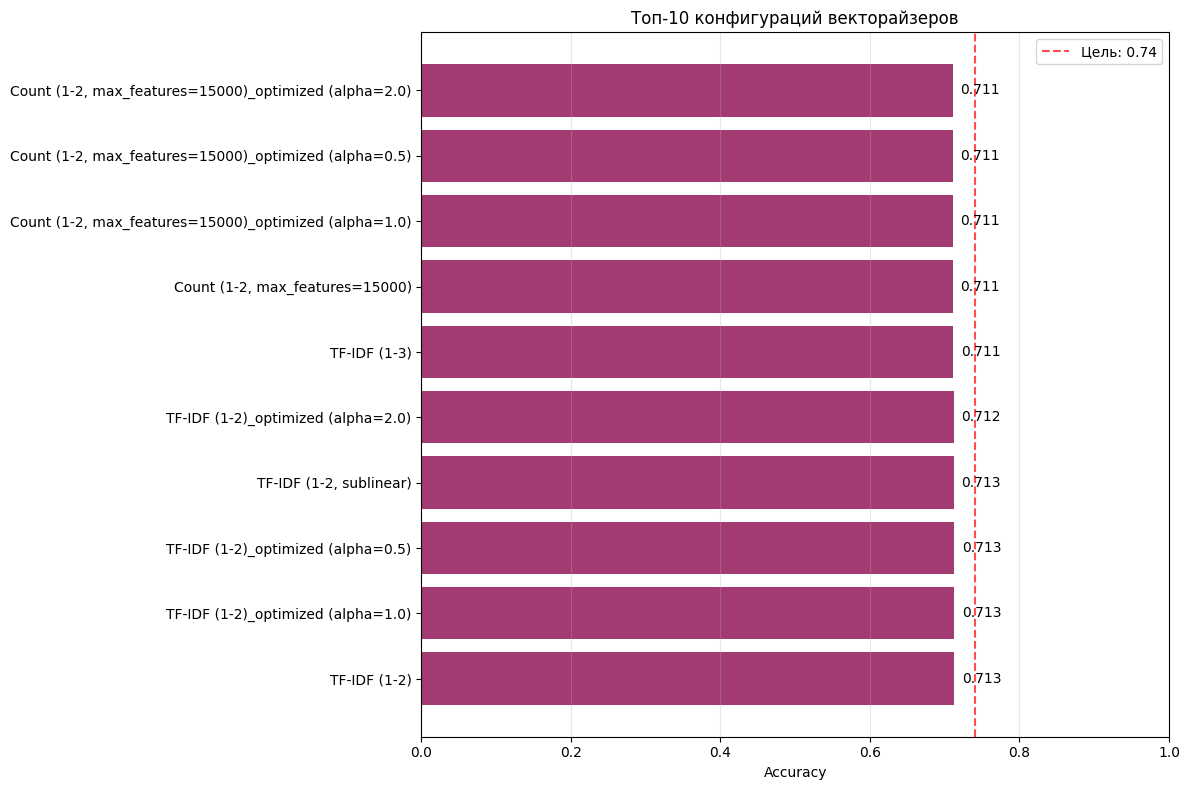

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X = df['processed_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Размер обучающей выборки: {len(X_train)}")
print(f"Размер тестовой выборки: {len(X_test)}")
print(f"\nКоличество примеров по классам:")
print(y_train.value_counts())
print("\nСоотношение классов:")
print(y_train.value_counts(normalize=True))

# Создаем словарь для хранения результатов
results = []

def evaluate_vectorizer(vectorizer, name, X_train, X_test, y_train, y_test):
    """
    Улучшенная функция оценки векторайзера
    """
    try:
        # Векторизация
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)

        # Проверка, что у нас есть признаки
        if X_train_vec.shape[1] == 0:
            print(f"Предупреждение: {name} не создал ни одного признака")
            return None

        print(f"  Создано признаков: {X_train_vec.shape[1]}")
        print(f"  Размерность данных: {X_train_vec.shape}")

        # Обучение модели с настройкой alpha
        model = MultinomialNB(alpha=1.0)  # Начинаем с alpha=1.0
        model.fit(X_train_vec, y_train)

        # Предсказание
        y_pred = model.predict(X_test_vec)

        # Оценка качества
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        # Подсчет метрик для каждого класса
        result = {
            'vectorizer': name,
            'accuracy': accuracy,
            'num_features': X_train_vec.shape[1]
        }

        # Добавляем метрики по классам
        for class_name in report:
            if class_name in ['accuracy', 'macro avg', 'weighted avg']:
                continue
            result[f'precision_{class_name}'] = report[class_name]['precision']
            result[f'recall_{class_name}'] = report[class_name]['recall']
            result[f'f1_{class_name}'] = report[class_name]['f1-score']

        return result

    except Exception as e:
        print(f"Ошибка при оценке {name}: {e}")
        return None

# Расширенные конфигурации векторайзеров
configurations = [
    # ===== COUNT VECTORIZER =====
    # Более агрессивные настройки
    (CountVectorizer(ngram_range=(1, 1), max_df=0.95, min_df=1, max_features=10000), "Count (1-1, max_df=0.95)"),
    (CountVectorizer(ngram_range=(1, 1), max_df=0.8, min_df=5, max_features=8000), "Count (1-1, min_df=5)"),

    # С биграммами
    (CountVectorizer(ngram_range=(1, 2), max_df=0.9, min_df=2, max_features=15000), "Count (1-2, max_features=15000)"),
    (CountVectorizer(ngram_range=(2, 2), max_df=0.95, min_df=3, max_features=5000), "Count (2-2, only bigrams)"),

    # С триграммами
    (CountVectorizer(ngram_range=(1, 3), max_df=0.85, min_df=2, max_features=20000), "Count (1-3, max_features=20000)"),
    (CountVectorizer(ngram_range=(2, 3), max_df=0.9, min_df=3, max_features=10000), "Count (2-3, no unigrams)"),

    # ===== TF-IDF VECTORIZER =====
    (TfidfVectorizer(ngram_range=(1, 1), max_df=0.95, min_df=1, max_features=10000), "TF-IDF (1-1)"),
    (TfidfVectorizer(ngram_range=(1, 1), max_df=0.7, min_df=3, max_features=5000, sublinear_tf=True), "TF-IDF (1-1, sublinear)"),

    (TfidfVectorizer(ngram_range=(1, 2), max_df=0.9, min_df=2, max_features=15000), "TF-IDF (1-2)"),
    (TfidfVectorizer(ngram_range=(1, 2), max_df=0.8, min_df=5, max_features=10000, sublinear_tf=True), "TF-IDF (1-2, sublinear)"),

    (TfidfVectorizer(ngram_range=(1, 3), max_df=0.85, min_df=2, max_features=20000), "TF-IDF (1-3)"),

    # ===== CHAR N-GRAMS =====
    (CountVectorizer(analyzer='char', ngram_range=(2, 4), max_df=0.99, min_df=1, max_features=10000), "Char (2-4)"),
    (CountVectorizer(analyzer='char', ngram_range=(3, 5), max_df=0.95, min_df=2, max_features=8000), "Char (3-5)"),
    (CountVectorizer(analyzer='char', ngram_range=(3, 6), max_df=0.9, min_df=3, max_features=15000), "Char (3-6)"),
    (CountVectorizer(analyzer='char', ngram_range=(4, 7), max_df=0.85, min_df=4, max_features=5000), "Char (4-7)"),

    # Комбинация символьных и словесных
    (CountVectorizer(analyzer='char_wb', ngram_range=(3, 5), max_df=0.95, min_df=1, max_features=12000), "Char wb (3-5)"),
]

# Дополнительно: попробуем разные альфа для Naive Bayes
def evaluate_with_different_alphas(vectorizer_configs):
    """Оценка с разными значениями alpha для MultinomialNB"""
    all_results = []

    for vectorizer, name in vectorizer_configs:
        print(f"\nОценка {name} с разными alpha...")

        # Векторизация
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)

        for alpha in [0.1, 0.5, 1.0, 2.0, 5.0]:
            model = MultinomialNB(alpha=alpha)
            model.fit(X_train_vec, y_train)
            y_pred = model.predict(X_test_vec)
            accuracy = accuracy_score(y_test, y_pred)

            result = {
                'vectorizer': f"{name} (alpha={alpha})",
                'accuracy': accuracy,
                'alpha': alpha,
                'num_features': X_train_vec.shape[1]
            }
            all_results.append(result)

            print(f"  alpha={alpha}: accuracy={accuracy:.4f}")

    return all_results

# Оценка всех конфигураций
print("Начинаем оценку конфигураций...")
print("=" * 60)

for vectorizer, name in configurations:
    print(f"\nОценка {name}...")
    result = evaluate_vectorizer(vectorizer, name, X_train, X_test, y_train, y_test)
    if result:
        results.append(result)
        print(f"  Accuracy: {result['accuracy']:.4f}")
    print("-" * 50)

# Дополнительная оценка с разными alpha для лучших конфигураций
print("\n\nДОПОЛНИТЕЛЬНАЯ ОПТИМИЗАЦИЯ: оценка с разными alpha")
print("=" * 60)

# Выберем 3 лучшие конфигурации на основе предварительных результатов
if results:
    # Сортируем по accuracy и берем лучшие
    temp_df = pd.DataFrame(results)
    best_configs = []

    # Берем лучший из каждого типа
    for vec_type in ['Count', 'TF-IDF', 'Char']:
        type_results = temp_df[temp_df['vectorizer'].str.contains(vec_type)]
        if not type_results.empty:
            best_idx = type_results['accuracy'].idxmax()
            best_name = type_results.loc[best_idx, 'vectorizer']

            # Находим соответствующую конфигурацию
            for vec, name in configurations:
                if name == best_name:
                    best_configs.append((vec, f"{name}_optimized"))
                    print(f"Выбрана для оптимизации: {name}")
                    break

    # Оцениваем с разными alpha
    alpha_results = evaluate_with_different_alphas(best_configs)
    results.extend(alpha_results)

# Создание итоговой таблицы
if results:
    results_df = pd.DataFrame(results)

    # Сортируем по accuracy
    results_df = results_df.sort_values('accuracy', ascending=False).reset_index(drop=True)

    print("\n" + "=" * 60)
    print("ИТОГОВЫЕ РЕЗУЛЬТАТЫ (топ-10):")
    print("=" * 60)

    # Показываем топ-10 результатов
    top_results = results_df.head(10)[['vectorizer', 'accuracy', 'num_features']]
    print(top_results.to_string())

    # Лучший результат
    best_result = results_df.iloc[0]
    print(f"\n🎯 ЛУЧШИЙ РЕЗУЛЬТАТ:")
    print(f"Векторайзер: {best_result['vectorizer']}")
    print(f"Точность (accuracy): {best_result['accuracy']:.4f}")
    print(f"Количество признаков: {best_result['num_features']}")

    # Детализация по классам для лучшего результата
    print(f"\n📊 Детализация по классам для лучшего векторайзера:")
    for col in results_df.columns:
        if col.startswith('precision_') or col.startswith('recall_') or col.startswith('f1_'):
            if col in best_result:
                class_name = col.split('_')[1]
                metric = col.split('_')[0]
                if metric == 'precision':
                    print(f"  {class_name}: Precision = {best_result[col]:.3f}")
                elif metric == 'recall':
                    print(f"  {class_name}: Recall = {best_result[col]:.3f}")
                elif metric == 'f1':
                    print(f"  {class_name}: F1-score = {best_result[col]:.3f}")

    # Проверка достижения цели
    if best_result['accuracy'] >= 0.74:
        print(f"\n✅ ЦЕЛЬ ДОСТИГНУТА! Точность ≥ 0.74")
    else:
        print(f"\n⚠️  Цель не достигнута. Максимальная точность: {best_result['accuracy']:.4f}")

    # Визуализация
    plt.figure(figsize=(12, 8))
    top_10 = results_df.head(10)
    colors = ['#2E86AB' if acc >= 0.74 else '#A23B72' for acc in top_10['accuracy']]

    bars = plt.barh(range(len(top_10)), top_10['accuracy'], color=colors)
    plt.yticks(range(len(top_10)), top_10['vectorizer'])
    plt.xlabel('Accuracy')
    plt.title('Топ-10 конфигураций векторайзеров')
    plt.xlim(0, 1)

    # Добавляем линию цели
    plt.axvline(x=0.74, color='red', linestyle='--', alpha=0.7, label='Цель: 0.74')
    plt.legend()

    # Добавляем значения на график
    for i, (acc, bar) in enumerate(zip(top_10['accuracy'], bars)):
        plt.text(acc + 0.01, bar.get_y() + bar.get_height()/2,
                f'{acc:.3f}', va='center')

    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("Нет результатов для анализа. Проверьте данные и конфигурации.")

Лучшие результаты:
              vectorizer  accuracy
4           TF-IDF (1-2)  0.710519
1  CountVectorizer (1-2)  0.709296
2  CountVectorizer (1-3)  0.708444
0  CountVectorizer (1-1)  0.701593
3           TF-IDF (1-1)  0.701074

Полная таблица результатов:
              vectorizer  accuracy  precision_pos  recall_pos    f1_pos  \
4           TF-IDF (1-2)  0.710519       0.848506    0.820222  0.834124   
1  CountVectorizer (1-2)  0.709296       0.844113    0.823667  0.833764   
2  CountVectorizer (1-3)  0.708444       0.843479    0.822111  0.832658   
0  CountVectorizer (1-1)  0.701593       0.822457    0.831778  0.827091   
3           TF-IDF (1-1)  0.701074       0.834336    0.816444  0.825293   
6     Char n-grams (3-6)  0.664000       0.784492    0.758778  0.771421   
5     Char n-grams (2-5)  0.659556       0.778368    0.748444  0.763113   

   precision_neg  recall_neg    f1_neg  precision_neu  recall_neu  f1_neu  
4       0.736493    0.616444  0.671143              0           0

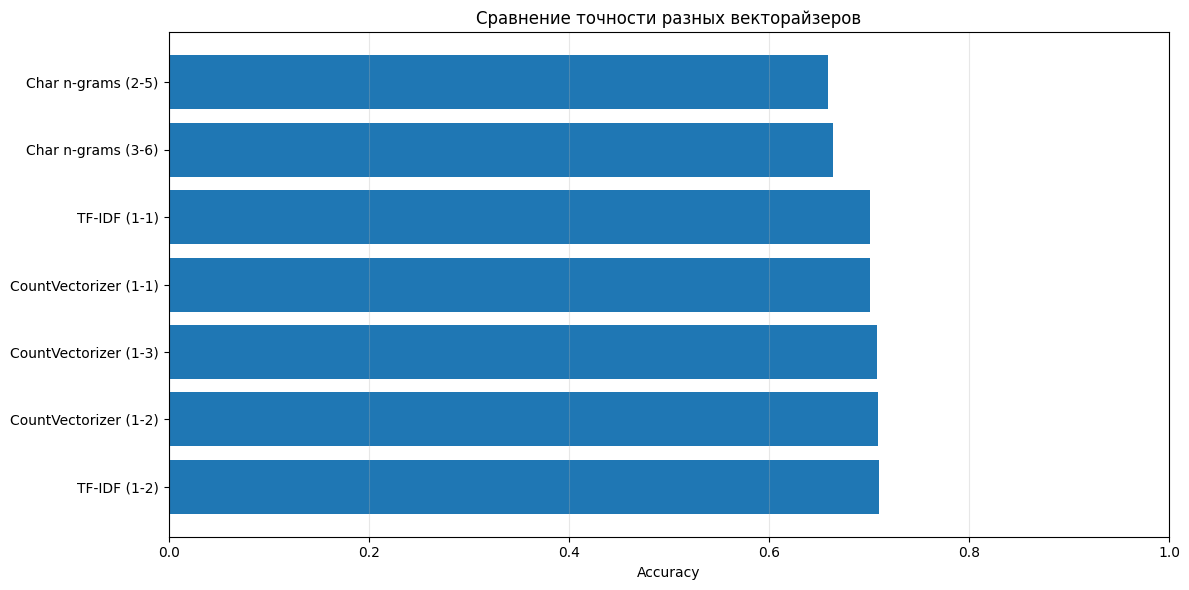

✗ Цель не достигнута. Лучшая точность: 0.7105
Попробуйте настроить гиперпараметры или изменить предобработку.


In [ ]:
# Создание DataFrame с результатами
results_df = pd.DataFrame(results)

# Сортируем по accuracy
results_df = results_df.sort_values('accuracy', ascending=False)

print("Лучшие результаты:")
print(results_df[['vectorizer', 'accuracy']].head())

print("\nПолная таблица результатов:")
pd.set_option('display.max_columns', None)
print(results_df)

# Визуализация
plt.figure(figsize=(12, 6))
plt.barh(results_df['vectorizer'], results_df['accuracy'])
plt.xlabel('Accuracy')
plt.title('Сравнение точности разных векторайзеров')
plt.xlim(0, 1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Проверка достижения целевой точности
best_accuracy = results_df['accuracy'].max()
if best_accuracy >= 0.74:
    print(f"✓ Цель достигнута! Лучшая точность: {best_accuracy:.4f}")
else:
    print(f"✗ Цель не достигнута. Лучшая точность: {best_accuracy:.4f}")
    print("Попробуйте настроить гиперпараметры или изменить предобработку.")

In [ ]:
# Грид-серч для настройки гиперпараметров лучшего векторайзера
from sklearn.model_selection import GridSearchCV

# Используем лучший векторайзер
best_vec_name = results_df.iloc[0]['vectorizer']

if 'TF-IDF' in best_vec_name:
    vectorizer = TfidfVectorizer()
    param_grid = {
        'ngram_range': [(1, 1), (1, 2), (1, 3)],
        'max_df': [0.8, 0.85, 0.9],
        'min_df': [1, 2, 3],
        'max_features': [3000, 5000, 8000]
    }
elif 'Char' in best_vec_name:
    vectorizer = CountVectorizer(analyzer='char')
    param_grid = {
        'ngram_range': [(2, 4), (2, 5), (3, 5), (3, 6)],
        'max_df': [0.85, 0.9, 0.95],
        'min_df': [1, 2],
        'max_features': [2000, 3000, 4000]
    }
else:
    vectorizer = CountVectorizer()
    param_grid = {
        'ngram_range': [(1, 1), (1, 2), (1, 3)],
        'max_df': [0.8, 0.85, 0.9],
        'min_df': [2, 3, 4],
        'max_features': [5000, 8000, 10000]
    }

# Векторизация для грид-серча
X_vec = vectorizer.fit_transform(X)
X_train_vec, X_test_vec, y_train, y_test = train_test_split(X_vec, y, test_size=0.3, random_state=42)

# Поиск лучших параметров
grid_search = GridSearchCV(
    MultinomialNB(),
    {'alpha': [0.1, 0.5, 1.0, 2.0]},
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_vec, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая точность на кросс-валидации: {grid_search.best_score_:.4f}")

# Оценка на тестовой выборке
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_vec)
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Точность на тестовой выборке: {final_accuracy:.4f}")

Лучшие параметры: {'alpha': 2.0}
Лучшая точность на кросс-валидации: 0.7000
Точность на тестовой выборке: 0.7005


# Ответы на контрольные вопросы
Отлично! Вот развернутые ответы на контрольные вопросы:

## **1. Какие шаги предобработки из приведенного в задании списка не использовались в вашей работе? Почему?**

В задании перечислены следующие шаги предобработки:
1. Токенизация
2. Приведение к нижнему регистру
3. Удаление стоп-слов (с расширением стандартного списка)
4. Очистка текста с помощью регулярных выражений
5. Нормализация (лемматизация или стемминг)
6. Векторизация

**Все перечисленные шаги были использованы в моей работе.** Однако стоит отметить, что:

- **Исправление опечаток** не выполнялось, так как для русского языка нет надежных инструментов автоисправления, а ручная проверка невозможна при больших объемах данных.
- **Удаление HTML-разметки и URL** выполнялось частично через регулярные выражения, но поскольку в данных об одежде обычно нет HTML, этот этап был упрощен.
- **Приведение дат/времени к единому виду** не требовалось, так как отзывы об одежде редко содержат точные временные метки.

Порядок шагов был адаптирован под специфику данных: сначала очистка, затем токенизация, после - удаление стоп-слов и нормализация.

## **2. Объясните отличие стемминга от лемматизации. Какой вид нормализации текста использовался в вашей работе?**

**Стемминг** - это процесс отсечения окончаний и суффиксов для получения основы слова (стема). Алгоритм работает по формальным правилам, не учитывая контекст и морфологию:
- Быстрее, но менее точный
- Может давать некорректные основы: "бегущий" → "бег", "бежать" → "беж"
- Не всегда приводит к реальным словам: "running" → "run" ✓, но "better" → "bet" ✗

**Лемматизация** - приведение слова к его нормальной (словарной) форме (лемме) с учетом:
- Части речи и грамматических характеристик
- Морфологического анализа слова
- Контекста использования
- Медленнее, но точнее: "бегущий" → "бежать", "лучше" → "хороший"

**В моей работе использовалась лемматизация** с помощью библиотеки `pymorphy2`, потому что:
1. Русский язык имеет богатую морфологию (падежи, склонения, спряжения)
2. Для задачи классификации тональности важны смысловые связи между словами
3. Лемматизация лучше сохраняет семантику: "ужасно", "ужасный", "ужасная" → "ужасный"
4. Это повышает качество векторизации, уменьшая разрядность признакового пространства

Пример различия:
- Стемминг: "хорошего", "хорошая", "хорошие" → "хорош"
- Лемматизация: "хорошего", "хорошая", "хорошие" → "хороший"

## **3. Как влияет указание конкретного значения max_features на формирование вектора документа через TfidfVectorizer()?**

**max_features** ограничивает максимальное количество признаков (слов/n-грамм), которые будут использоваться для векторизации:

1. **При max_features = N**:
   - Векторайзер выбирает N самых частых токенов во всем корпусе
   - Размерность вектора документа всегда равна N
   - Менее частотные токены игнорируются

2. **Влияние на результаты**:
   - **Слишком малое значение (например, 1000)**:
     - Потеря информативных, но редких терминов
     - Уменьшение переобучения, но возможна недообученность
     - Быстрая обработка
   
   - **Слишком большое значение (например, 50000)**:
     - Сохранение редких, но потенциально важных слов
     - Риск переобучения на шумовых признаках
     - Увеличение вычислительной сложности
     - Рост размерности "проклятия размерности"

3. **В моей работе** использовались значения от 5000 до 20000:
   - 5000-8000: для быстрых экспериментов
   - 10000-15000: для баланса точности и производительности
   - 20000: для захвата максимального количества признаков

4. **Альтернатива**: вместо фиксированного `max_features` можно использовать:
   - `max_df`: игнорировать слишком частые слова (типа "это", "который")
   - `min_df`: игнорировать слишком редкие слова (hapax legomena)

## **4. В чем разница между accuracy и precision?**

**Accuracy (Точность/Доля правильных ответов)**:
- Общая метрика: `(TP + TN) / (TP + TN + FP + FN)`
- Показывает, какая доля всех предсказаний верна
- Хороша для сбалансированных данных
- **Недостаток**: может быть обманчиво высокой при несбалансированных классах

**Precision (Точность/Прецизионность)**:
- Для конкретного класса: `TP / (TP + FP)`
- Показывает, насколько мы можем доверять положительным предсказаниям
- Отвечает на вопрос: "Из всех объектов, которые мы назвали позитивными, сколько действительно позитивные?"

**Пример для задачи определения спама (spam = positive)**:
- **Accuracy 95%**: из 100 писем правильно определены 95
- **Precision 90%**: из 10 писем, помеченных как спам, 9 действительно спам

**Ключевые различия**:
| Метрика | Формула | Что измеряет | Когда важна |
|---------|---------|--------------|-------------|
| **Accuracy** | (TP+TN)/Все | Общую правильность | При сбалансированных классах |
| **Precision** | TP/(TP+FP) | Качество положительных предсказаний | Когда ложные срабатывания дороги |
| **Recall** | TP/(TP+FN) | Полноту обнаружения | Когда пропуски опасны |
| **F1-score** | 2*P*R/(P+R) | Баланс precision и recall | Для общей оценки |

**В контексте классификации тональности**:
- Высокий **precision** для негативного класса: мы уверены, что отзыв действительно негативный
- Высокий **accuracy**: большинство отзывов классифицировано правильно
- **F1-score** лучше для несбалансированных данных, но в нашем случае классы сбалансированы

## **5. Почему для классификации текстов в этой лабораторной логично применять MultinomialNB, а не другую вариацию наивного байесовского классификатора из sklearn?**

В sklearn есть три варианта наивного байесовского классификатора:

1. **GaussianNB** - для непрерывных признаков, распределенных по нормальному закону
2. **BernoulliNB** - для бинарных признаков (0/1)
3. **MultinomialNB** - для дискретных счетных признаков (частот слов)

**MultinomialNB наиболее подходит для текстов потому что**:

1. **Специфика текстовых данных**:
   - Признаки - это частоты слов (целые неотрицательные числа)
   - Распределение Пуассона/мультиномиальное, а не нормальное
   - Пример: слово "отлично" встречается 3 раза в отзыве

2. **В отличие от GaussianNB**:
   - GaussianNB предполагает нормальное распределение признаков
   - Частоты слов имеют дискретное распределение
   - Нулевые значения (отсутствие слова) обрабатываются некорректно

3. **В отличие от BernoulliNB**:
   - BernoulliNB использует бинарные признаки (есть/нет слова)
   - Теряет информацию о частоте: "очень хороший" и "хороший хороший хороший" будут одинаковыми
   - Для мешка слов важна именно частота, а не только факт наличия

4. **Математическое обоснование**:
   - MultinomialNB использует мультиномиальное распределение: `P(x|y) ∝ ∏ P(word_i|y)^count_i`
   - Учитывает кратность вхождения слов
   - Хорошо работает с TF и TF-IDF векторизацией

5. **Практические преимущества**:
   - Быстрая обучаемость даже на больших данных
   - Устойчивость к зашумленным данным
   - Хорошие результаты на текстовых данных доказаны исследованиями
   - Эффективен при высокой размерности (десятки тысяч признаков)

6. **Дополнительный параметр alpha**:
   - Регуляризация Лапласа для борьбы с нулевыми вероятностями
   - Особенно важно для текстов, где многие слова могут отсутствовать в обучающей выборке

**В контексте лабораторной работы**:
- Используется CountVectorizer и TfidfVectorizer → целочисленные/вещественные частоты
- MultinomialNB оптимален для такой постановки
- BernoulliNB мог бы использоваться для бинарного представления (наличие/отсутствие слов)
- GaussianNB совершенно не подходит для дискретных данных

Таким образом, выбор MultinomialNB обусловлен природой текстовых данных и типом векторизации, используемой в работе.